In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\EastWestAirlines.csv")

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
data = data.drop({'Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Award?'},axis=1)

In [5]:
data.head()

,ID#,Balance,Bonus_miles,Days_since_enroll
0,1,28143,174,7000
1,2,19244,215,6968
2,3,41354,4123,7034
3,4,14776,500,6952
4,5,97752,43300,6935


array([[<AxesSubplot:title={'center':'ID#'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'Bonus_miles'}>,
        <AxesSubplot:title={'center':'Days_since_enroll'}>]], dtype=object)

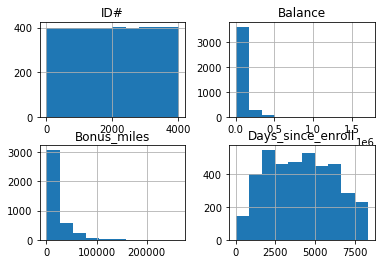

In [6]:
data.hist()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Bonus_miles        3999 non-null   int64
 3   Days_since_enroll  3999 non-null   int64
dtypes: int64(4)
memory usage: 125.1 KB


In [8]:
array=data.values

In [9]:
array

array([[    1, 28143,   174,  7000],
       [    2, 19244,   215,  6968],
       [    3, 41354,  4123,  7034],
       ...,
       [ 4019, 73597, 25447,  1402],
       [ 4020, 54899,   500,  1401],
       [ 4021,  3016,     0,  1398]], dtype=int64)

In [10]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [11]:
X

array([[-1.73512503e+00, -4.51140783e-01, -7.02786266e-01,
         1.39545434e+00],
       [-1.73426342e+00, -5.39456874e-01, -7.01088399e-01,
         1.37995704e+00],
       [-1.73340181e+00, -3.20031232e-01, -5.39252702e-01,
         1.41192021e+00],
       ...,
       [ 1.72682006e+00, -4.29480975e-05,  3.43803696e-01,
        -1.31560393e+00],
       [ 1.72768167e+00, -1.85606976e-01, -6.89286154e-01,
        -1.31608822e+00],
       [ 1.72854328e+00, -7.00507951e-01, -7.09991847e-01,
        -1.31754109e+00]])

In [12]:
y = pd.DataFrame(X)
y.describe()

,0,1,2,3
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,7.879002e-17,5.756558e-16,-5.515024e-16,1.406727e-15
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-1.735125e+00,-7.304396e-01,-7.099918e-01,-1.993611e+00
25%,-8.653307e-01,-5.465676e-01,-6.582276e-01,-8.661823e-01
50%,1.017168e-03,-3.027332e-01,-4.130308e-01,-1.092530e-02
75%,8.665034e-01,1.866028e-01,2.756198e-01,8.097050e-01
max,1.728543e+00,1.618884e+01,1.020957e+01,2.023095e+00


In [13]:
dbscan = DBSCAN(eps=3, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=3, min_samples=3)

In [14]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [16]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [17]:
pd.concat([data,cl],axis=1)

,ID#,Balance,Bonus_miles,Days_since_enroll,cluster
0,1,28143,174,7000,0
1,2,19244,215,6968,0
2,3,41354,4123,7034,0
3,4,14776,500,6952,0
4,5,97752,43300,6935,0
...,...,...,...,...,...
3994,4017,18476,8525,1403,0
3995,4018,64385,981,1395,0
3996,4019,73597,25447,1402,0
3997,4020,54899,500,1401,0
